<a href="https://colab.research.google.com/github/liggettla/Malthusian/blob/master/Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
df = {
    'Yeast' : {
        1 : Yeast(),
        2 : Yeast(),
    },

    'Cyanobacteria' : {
        1 : Cyanobacteria()
    }
}
'''

In [1]:
from typing import DefaultDict
import pandas as pd
import seaborn as sns

In [25]:
class Yeast:
    def __init__(self):
        self.o2 = -1
        self.co2 = 1
        self.carbon = 0

class Cyanobacteria:
    def __init__(self):
        self.o2 = 1
        self.co2 = -1
        self.carbon = 0

class Organism:
    def __init__(self):
        self.o2 = 1
        self.co2 = -1
        self.carbon = 0

# seed the world with organisms
def big_bang(num_yeast, num_cyanobacteria):
    yeast_census = []
    cyanobacteria_census = []

    # dict that holds all living organisms
    df = DefaultDict(dict)

    for i in range(num_yeast):
        df['Yeast'][i+1] = Yeast()
        yeast_census.append(i)

    for i in range(num_cyanobacteria):
        df['Cyanobacteria'][i+1] = Cyanobacteria()
        cyanobacteria_census.append(i)
    
    return df, yeast_census, cyanobacteria_census

def resource_check(individual, global_o2, global_co2):
    if global_o2 + individual.o2 >= 0 and global_co2 + individual.co2 >= 0:
        return True
    else:
        return False

def metabolize(individual, global_o2, global_co2):
    global_o2 += individual.o2
    global_co2 += individual.co2
    return global_o2, global_co2

def reproduce(newborns, organism, num_yeast, num_cyanobacteria):
    if organism == 'Yeast':
        num_yeast += 1
        newborns[organism][num_yeast] = Yeast()

    if organism == 'Cyanobacteria':
        num_cyanobacteria += 1
        newborns[organism][num_cyanobacteria] = Cyanobacteria()
    
    return newborns, num_yeast, num_cyanobacteria

def census(total_population, df):
    total_population['Yeast'].append(len(df['Yeast']))
    total_population['Cyanobacteria'].append(len(df['Cyanobacteria']))

    return total_population

def day(day_num, num_yeast, num_cyanobacteria, global_o2, global_co2, df, total_population):

    organism_key = {
        'Yeast' : Yeast(),
        'Cyanobacteria' : Cyanobacteria(),
    }

    # let there be light
    if day_num == 1:
        df, yeast_census, cyanobacteria_census = big_bang(num_yeast, num_cyanobacteria)

    # all the babies born today
    newborns = DefaultDict(dict)

    # all organisms that will die today
    hitlist = DefaultDict(list)

    # iterate through keys so dict items can be deleted without error
    for organism in list(df.keys()):
        for individual in list(df[organism].keys()):
            # check for sufficient resources
            if resource_check(df[organism][individual], global_o2, global_co2):
                # metabolize
                global_o2, global_co2 = metabolize(df[organism][individual], global_o2, global_co2)
                # reproduce
                newborns, num_yeast, num_cyanobacteria = reproduce(newborns, organism, num_yeast, num_cyanobacteria)

            # die if insufficient resourses
            else:
                hitlist[organism].append(individual)
    
    # kill organisms that starve
    for organism in hitlist:
        for individual in hitlist[organism]:
            del df[organism][individual]

    # give birth
    for organism in newborns:
        for individual in newborns[organism]:
            df[organism][individual] = organism_key[organism] 
    
    total_population = census(total_population, df)
    
    return df, num_yeast, num_cyanobacteria, global_o2, global_co2, total_population

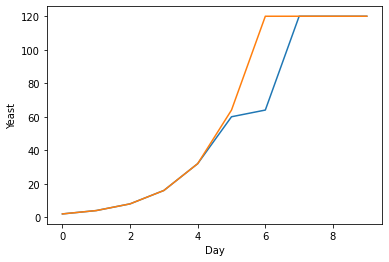

In [26]:
df = {}
day_num = 1

# track populations
total_population = {
    'Yeast' : [],
    'Cyanobacteria': [],
}


num_yeast = 1
num_cyanobacteria = 1

global_o2 = 30
global_co2 = 30

for i in range(10):
    df, num_yeast, num_cyanobacteria, global_o2, global_co2, total_population = day(day_num, num_yeast, num_cyanobacteria, global_o2, global_co2, df, total_population)
    
    # print(f'O2: {global_o2},', f'CO2: {global_co2}')
    # print(df)
    # print(total_population)

history = pd.DataFrame(total_population).reset_index().rename(columns={'index':'Day'})
# melt().rename(columns={'variable':'Organism','value':'Population'})

sns.lineplot(
    data=history, x="Day", y="Yeast")
sns.lineplot(
    data=history, x="Day", y="Cyanobacteria")